# Traffic Crashes Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("C:/Users/Ayesha/Downloads/Traffic_Crashes_-_Crashes.csv")

In [3]:
df.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,NaN,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",...,2.0,0.0,2.0,0.0,19,3,9,NaN,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,NaN,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,...,0.0,0.0,2.0,0.0,18,6,9,NaN,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952)
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,NaN,08/09/2023 11:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,...,0.0,0.0,2.0,0.0,23,4,8,NaN,NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN


# Data Cleaning

In [4]:
df.isnull().sum() / len(df) * 100

CRASH_RECORD_ID                   0.000000
CRASH_DATE_EST_I                 92.502426
CRASH_DATE                        0.000000
POSTED_SPEED_LIMIT                0.000000
TRAFFIC_CONTROL_DEVICE            0.000000
DEVICE_CONDITION                  0.000000
WEATHER_CONDITION                 0.000000
LIGHTING_CONDITION                0.000000
FIRST_CRASH_TYPE                  0.000000
TRAFFICWAY_TYPE                   0.000000
LANE_CNT                         74.824313
ALIGNMENT                         0.000000
ROADWAY_SURFACE_COND              0.000000
ROAD_DEFECT                       0.000000
REPORT_TYPE                       2.917255
CRASH_TYPE                        0.000000
INTERSECTION_RELATED_I           77.082972
NOT_RIGHT_OF_WAY_I               95.376289
HIT_AND_RUN_I                    68.747415
DAMAGE                            0.000000
DATE_POLICE_NOTIFIED              0.000000
PRIM_CONTRIBUTORY_CAUSE           0.000000
SEC_CONTRIBUTORY_CAUSE            0.000000
STREET_NO  

In [5]:
mode_direction = df['STREET_DIRECTION'].mode()[0]
df['STREET_DIRECTION'].fillna(mode_direction, inplace=True)
mode_name = df['STREET_NAME'].mode()[0]
df['STREET_NAME'].fillna(mode_name, inplace=True)

In [6]:
columns_to_drop = [
    'LATITUDE', 'LONGITUDE', 'LOCATION',
    'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
    'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
    'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'BEAT_OF_OCCURRENCE',
    'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
    'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NOT_RIGHT_OF_WAY_I',
    'HIT_AND_RUN_I', 'LANE_CNT', 'INTERSECTION_RELATED_I', 'REPORT_TYPE',
    'CRASH_DATE_EST_I','MOST_SEVERE_INJURY', 'NUM_UNITS',
]

df.drop(columns=columns_to_drop, inplace=True)

In [7]:
df.isnull().sum() / len(df) * 100

CRASH_RECORD_ID            0.0
CRASH_DATE                 0.0
POSTED_SPEED_LIMIT         0.0
TRAFFIC_CONTROL_DEVICE     0.0
DEVICE_CONDITION           0.0
WEATHER_CONDITION          0.0
LIGHTING_CONDITION         0.0
FIRST_CRASH_TYPE           0.0
TRAFFICWAY_TYPE            0.0
ALIGNMENT                  0.0
ROADWAY_SURFACE_COND       0.0
ROAD_DEFECT                0.0
CRASH_TYPE                 0.0
DAMAGE                     0.0
DATE_POLICE_NOTIFIED       0.0
PRIM_CONTRIBUTORY_CAUSE    0.0
SEC_CONTRIBUTORY_CAUSE     0.0
STREET_NO                  0.0
STREET_DIRECTION           0.0
STREET_NAME                0.0
CRASH_HOUR                 0.0
CRASH_DAY_OF_WEEK          0.0
CRASH_MONTH                0.0
dtype: float64

# Data Analysis and Visualization

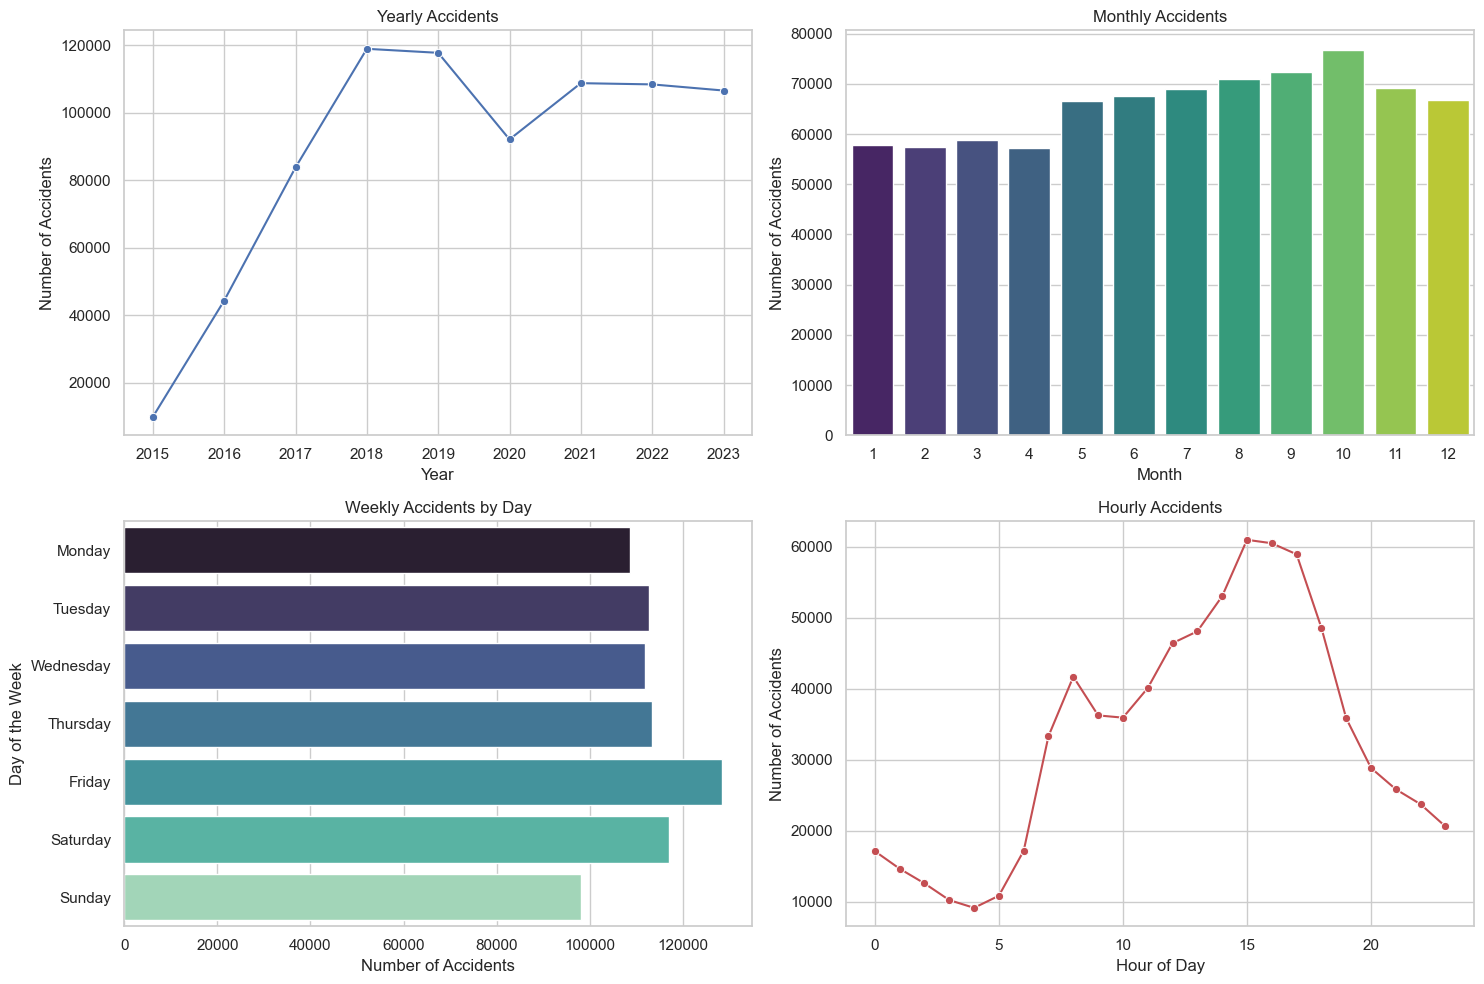

In [8]:
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'])
df['CRASH_YEAR'] = df['CRASH_DATE'].dt.year
df['CRASH_MONTH'] = df['CRASH_DATE'].dt.month
df['CRASH_HOUR'] = df['CRASH_DATE'].dt.hour
df['DAY_OF_WEEK'] = df['CRASH_DATE'].dt.day_name()
df = df[df['CRASH_YEAR'] >= 2015]
yearly_accidents = df['CRASH_YEAR'].value_counts().sort_index()
monthly_accidents = df['CRASH_MONTH'].value_counts().sort_index()
hourly_accidents = df['CRASH_HOUR'].value_counts().sort_index()
day_of_week_accidents = df['DAY_OF_WEEK'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.lineplot(x=yearly_accidents.index, y=yearly_accidents.values, marker='o', color='b')
plt.title('Yearly Accidents')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.subplot(2, 2, 2)
sns.barplot(x=monthly_accidents.index, y=monthly_accidents.values, palette="viridis")
plt.title('Monthly Accidents')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.subplot(2, 2, 3)
sns.barplot(x=day_of_week_accidents.values, y=day_of_week_accidents.index, palette="mako")
plt.title('Weekly Accidents by Day')
plt.xlabel('Number of Accidents')
plt.ylabel('Day of the Week')
plt.subplot(2, 2, 4)
sns.lineplot(x=hourly_accidents.index, y=hourly_accidents.values, marker='o', color='r')
plt.title('Hourly Accidents')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

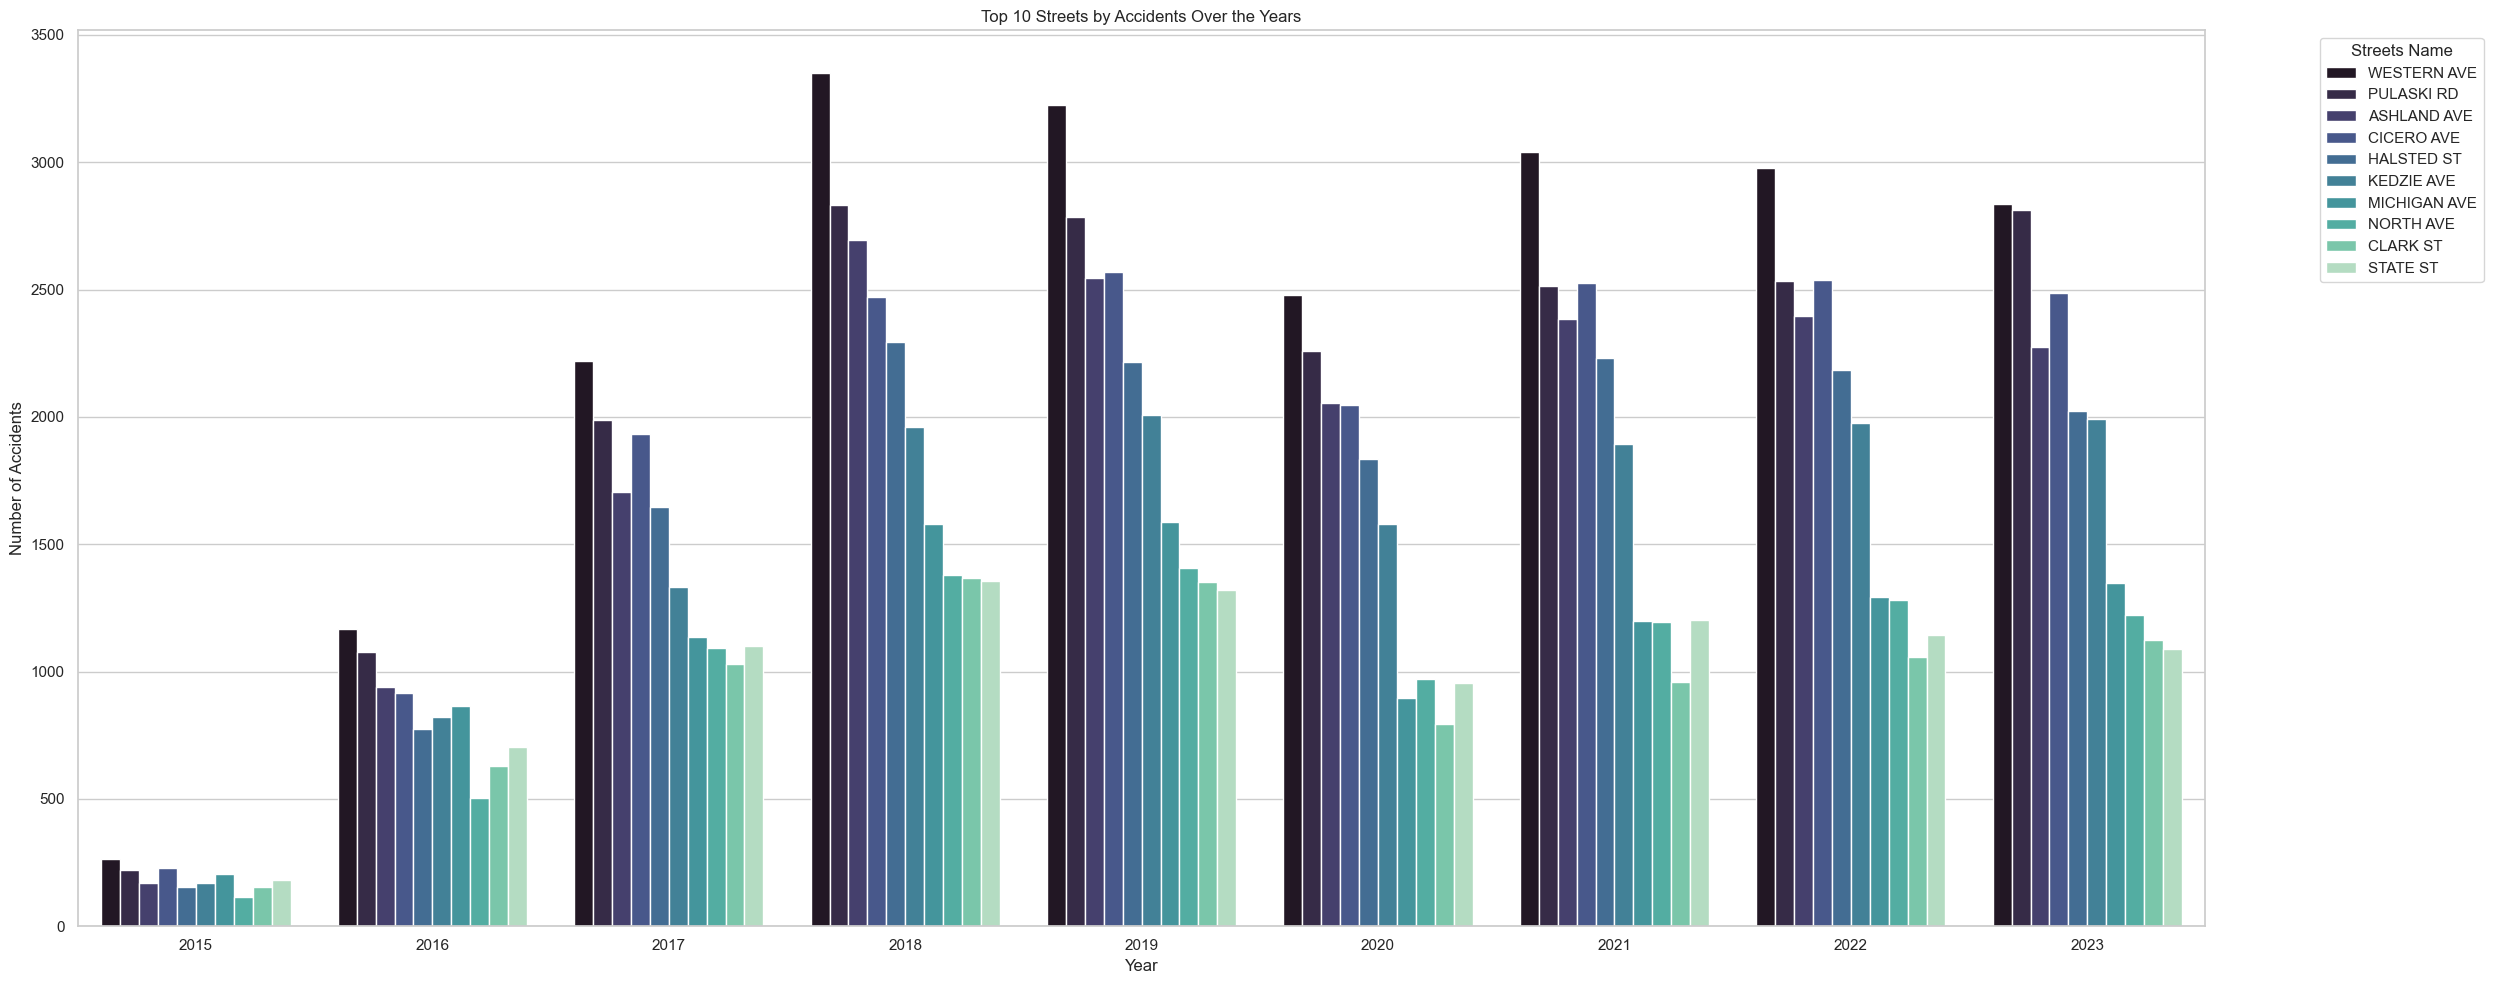

In [9]:
street_accidents_all_years = df.groupby(['STREET_NAME', 'CRASH_YEAR']).size().reset_index(name='ACCIDENT_COUNT')
top_10_streets = street_accidents_all_years.groupby('STREET_NAME')['ACCIDENT_COUNT'].sum().nlargest(10).index
top_10_data = street_accidents_all_years[street_accidents_all_years['STREET_NAME'].isin(top_10_streets)]
top_10_data = top_10_data.sort_values(by='ACCIDENT_COUNT', ascending=False)

plt.figure(figsize=(25, 10))
sns.barplot(data=top_10_data, x='CRASH_YEAR', y='ACCIDENT_COUNT', hue='STREET_NAME', palette='mako')
plt.title('Top 10 Streets by Accidents Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend(title='Streets Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

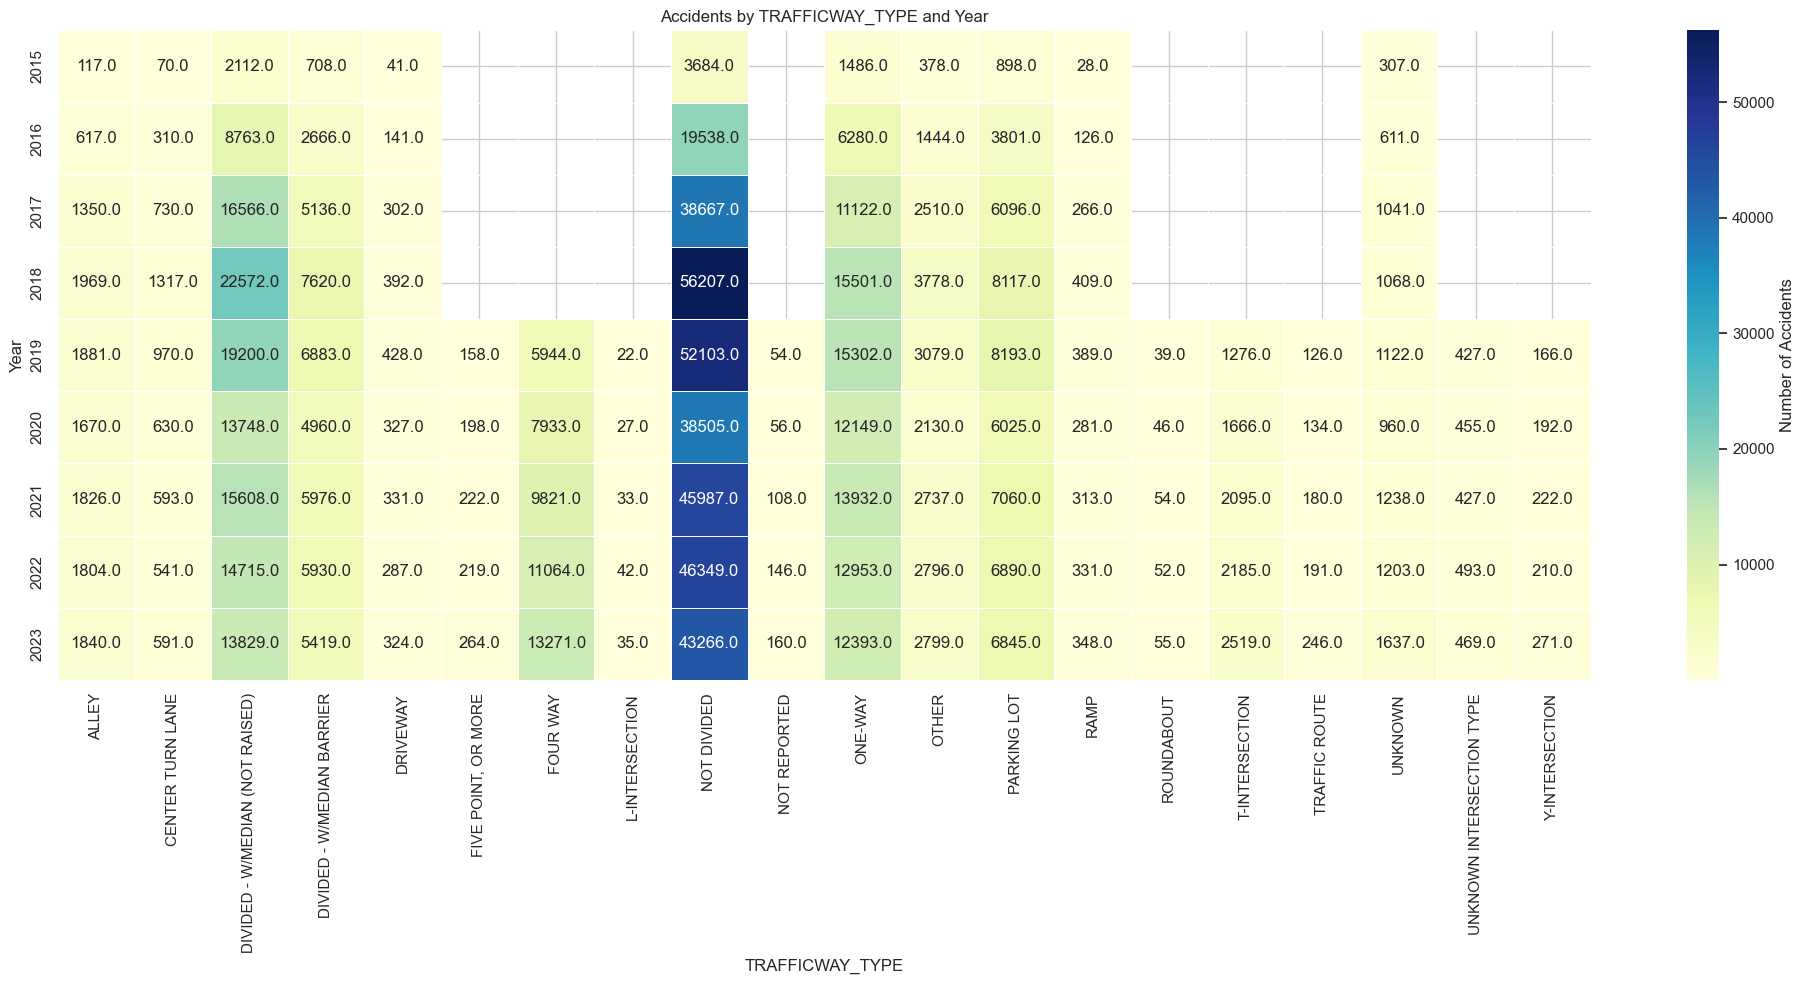

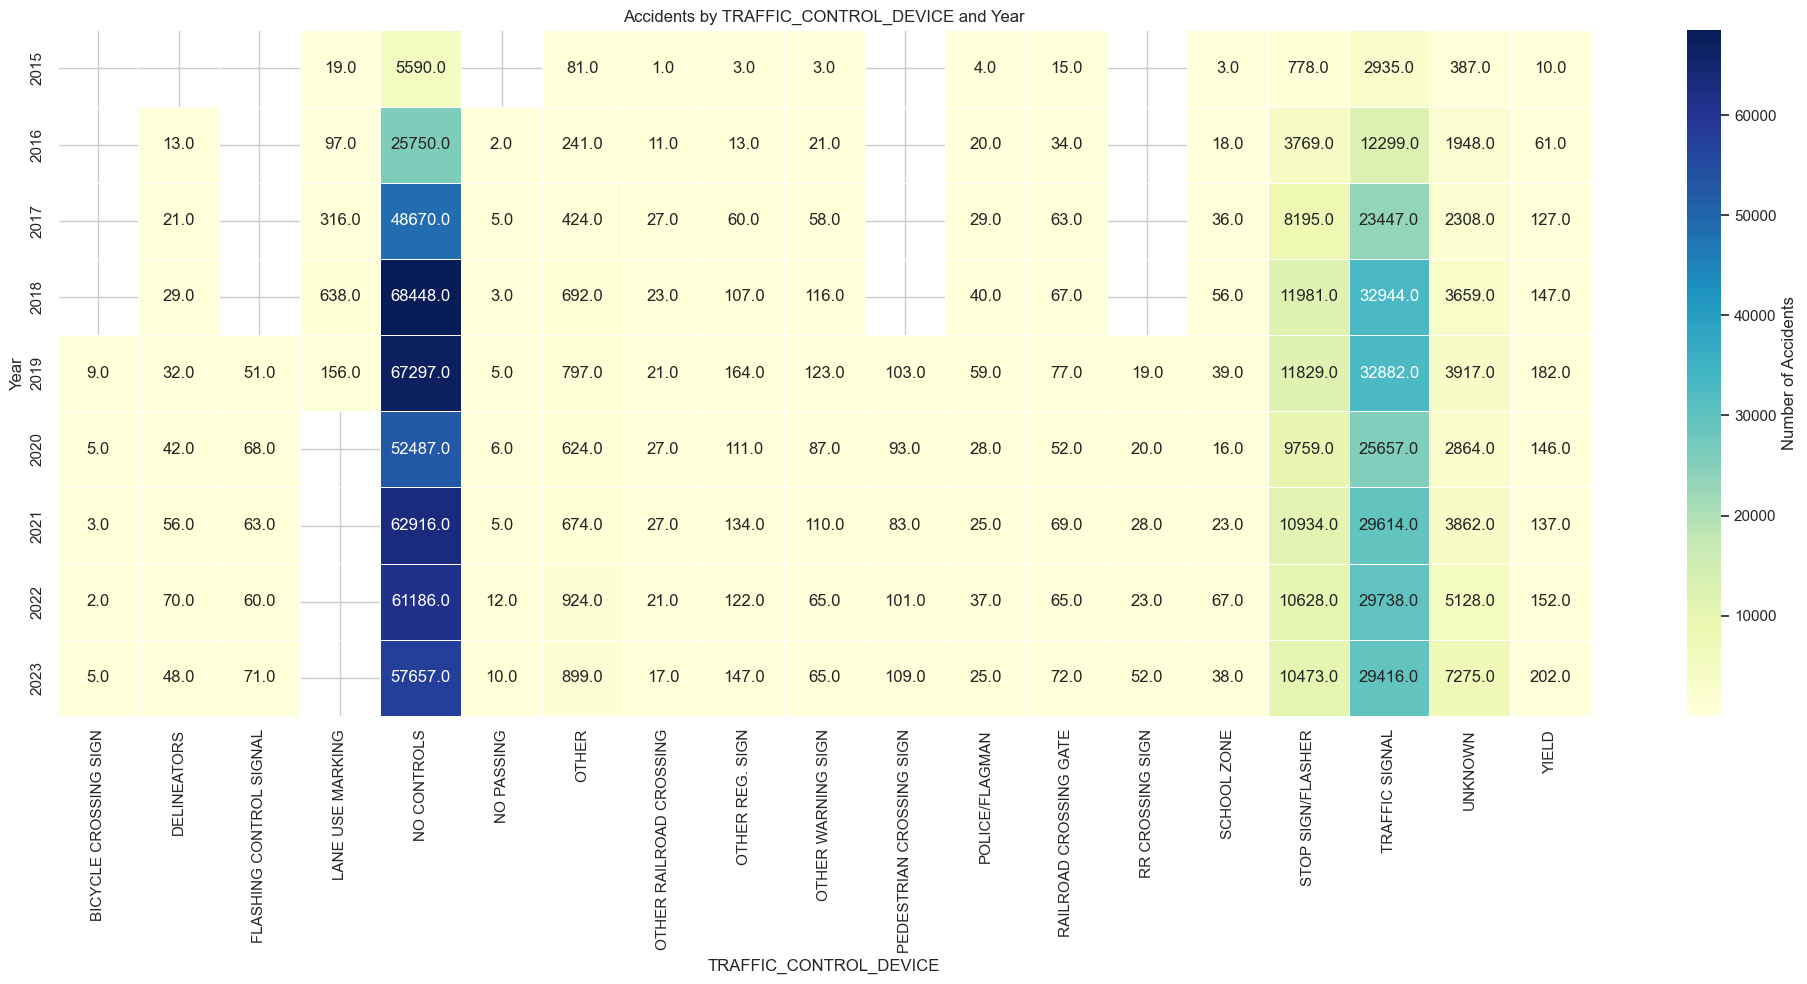

In [10]:
trafficway_type_accidents_all_years = df.groupby(['TRAFFICWAY_TYPE', 'CRASH_YEAR']).size().reset_index(name='ACCIDENT_COUNT')
heatmap_data_trafficway_type = trafficway_type_accidents_all_years.pivot_table(index='CRASH_YEAR', columns='TRAFFICWAY_TYPE', values='ACCIDENT_COUNT', aggfunc='sum')
plt.figure(figsize=(20, 10))
sns.heatmap(heatmap_data_trafficway_type, cmap="YlGnBu", annot=True, fmt=".1f", linewidths=.5, cbar_kws={'label': 'Number of Accidents'})
plt.title('Accidents by TRAFFICWAY_TYPE and Year')
plt.xlabel('TRAFFICWAY_TYPE')
plt.ylabel('Year')
plt.tight_layout()

traffic_control_device_accidents_all_years = df.groupby(['TRAFFIC_CONTROL_DEVICE', 'CRASH_YEAR']).size().reset_index(name='ACCIDENT_COUNT')
heatmap_data_traffic_control_device = traffic_control_device_accidents_all_years.pivot_table(index='CRASH_YEAR', columns='TRAFFIC_CONTROL_DEVICE', values='ACCIDENT_COUNT', aggfunc='sum')
plt.figure(figsize=(20, 10))
sns.heatmap(heatmap_data_traffic_control_device, cmap="YlGnBu", annot=True, fmt=".1f", linewidths=.5, cbar_kws={'label': 'Number of Accidents'})
plt.title('Accidents by TRAFFIC_CONTROL_DEVICE and Year')
plt.xlabel('TRAFFIC_CONTROL_DEVICE')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

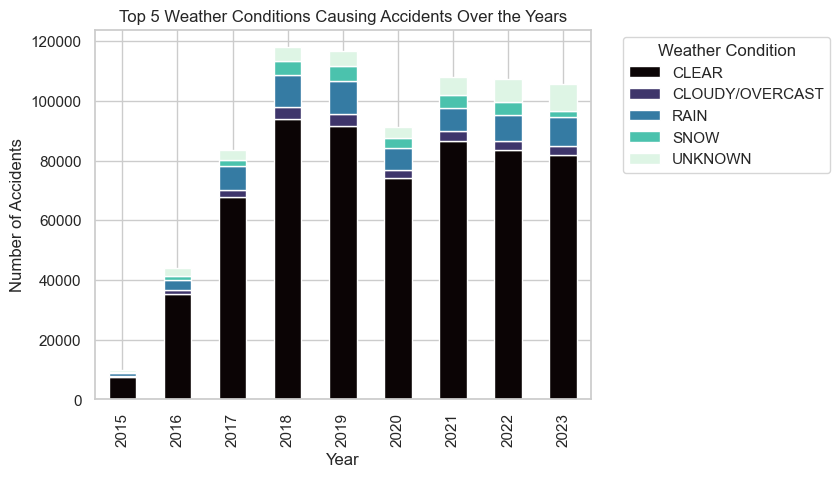

In [13]:
grouped_data_weather = df.groupby(['WEATHER_CONDITION', 'CRASH_YEAR']).size().reset_index(name='ACCIDENT_COUNT')
top_weather_conditions = grouped_data_weather.groupby('WEATHER_CONDITION')['ACCIDENT_COUNT'].sum().nlargest(5).index
filtered_data = grouped_data_weather[grouped_data_weather['WEATHER_CONDITION'].isin(top_weather_conditions)]
pivot_data_weather = filtered_data.pivot_table(index='CRASH_YEAR', columns='WEATHER_CONDITION', values='ACCIDENT_COUNT', fill_value=0)
plt.figure(figsize=(12, 8))
pivot_data_weather.plot(kind='bar', stacked=True, colormap='mako')
plt.title('Top 5 Weather Conditions Causing Accidents Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend(title='Weather Condition', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

# REFERENCES
1)https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset

2)https://re-thought.com/pandas-value_counts/

3)https://www.w3schools.com/python/matplotlib_subplot.asp

4)https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

5)https://seaborn.pydata.org/generated/seaborn.barplot.html

6)https://seaborn.pydata.org/generated/seaborn.heatmap.html

7)https://gist.github.com/chencyluo/ab0d77c049f38801f199687e6ce409b3

8)https://www.kaggle.com/code/sohamsave/accident-data-analysis

9)https://github.com/ninogarcia/UK-Road-Accident-Case-Study